# Problem Background: The Great Migration

In our ongoing efforts to ensure the safety of the migration to Earth Junior, we have developed a linear regression model that produces a human-zombie score ranging from 0 to 100. This score is designed to assess the likelihood of individuals being human or zombie based on various features collected during screening.

To enhance our security measures, the spaceship station has deployed a specialized automated barrier system that utilizes the human-zombie scores to classify individuals into three distinct categories:

- **Class 0: Score Range 0-33**: **Most Likely Human**  
  Individuals in this range will be directed straight to the spaceship for immediate boarding.

- **Class 1: Score Range 33-66**: **Need Further Tests**  
  Those with scores in this range will be redirected to a testing facility for additional examinations to confirm their identity. They will be quarantined for a two-week observational period to ensure they do not pose a risk.

- **Class 3: Score Range 66-100**: **Most Likely Zombies**  
  Those scoring in this highest range will be denied entry to the spaceship, as they are deemed a significant threat to the safety of the remaining human population.

This classification system aims to maximize the chances of a successful migration while ensuring that the risk of zombie infiltration is minimized.


# Programming Assignment 2: Task 2 -- Logistic Regression  [80 Marks]

### Introduction

In this task, you will be Logistic Regression models for the provided dataset from scratch. A description of the problem statement is given at the start of part. It is important that you display the output where asked. In case of no outputs, you will get a 0 for that part.

After this notebook you should be able to:

- Implement a classifier using Logistic Regression.

- Create a Logistic Regression model using simple `numpy`.

Have fun!

### Instructions

- Follow along with the notebook, filling out the necessary code where instructed.

- <span style="color: red;">Read the Submission Instructions and Plagiarism Policy in the attached PDF.</span>

- <span style="color: red;">Make sure to run all cells for credit.</span>

- <span style="color: red;">Do not remove any pre-written code.</span> We will be using the `print` statements to grade your assignment.

- <span style="color: red;">You must attempt all parts.</span> Do not assume that because something is for 0 marks, you can leave it - it will definitely be used in later parts.

- <span style="color: red;">Do not use unauthorized libraries.</span> You are not allowed to use `sklearn` in Part A of both tasks. Failure to follow these instructions will result in a serious penalty.

<center>
  <img src = "https://miro.medium.com/v2/resize:fit:1100/format:webp/1*RElrybCZ4WPsUfRwDl7fqA.png">
</center>

One vs All (OvA) is a common technique to extend binary classifiers, like logistic regression, to handle multiclass classification tasks. For each class in the dataset, a logistic regression model is trained to distinguish that class from all other classes. For instance, for a `m` class classification, we will have `m` logistic regression classifiers in our pipeline. When making a prediction, each model outputs a probability that the instance belongs to its target class. The class with the highest probability across all models is chosen as the final prediction.

In this part, we will be going over how to implement a Multiclass Logistic Regression (OvA) model from scratch. For a review of this concept, you can go over the course slides or go over this [resource](https://www.cs.rice.edu/~as143/COMP642_Spring22/Scribes/Lect5).

## Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

#### Dataset

You will use the same dataset as Part A.

Load the Dataset and other necessary files.

In [21]:
data = pd.read_csv("human_zombie_dataset_v5.csv")

# Preprocessing   [20 Marks]

In this step, you will need to make several changes to the dataset before we can proceed with the analysis. Follow the guidelines below:

1. **Transform Labels**:  
   Convert the labels from continuous scores to categorical labels based on the class descriptions provided earlier.  
   This transformation is crucial for training the classifier effectively. **[5 Points]**

2. **Perform Train-Test Split**:  
   Split the dataset into training and testing sets (8:2), and then check the sizes of both.  
   This step ensures that you have the right distribution of data for training and evaluation. **[5 Points]**

3. **Normalize Data**:  
   Utilize the `Scaler` class that you created in Part 1 to normalize the features of the dataset. **[10 Points]**


In [22]:
def categorize_score(score):
    if score <= 33:
        return 0
    elif 33 < score <= 66:
        return 1
    else:
        return 2

data['target'] = data['Human-Zombie Score'].apply(categorize_score)
data = data.drop(columns=['Human-Zombie Score'])

In [23]:
X = data.drop(columns=['target']).values
y = data['target'].values

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (600, 6)
Validation set size: (200, 6)
Test set size: (200, 6)


In [97]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        X = np.asarray(X)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.std = np.where(self.std == 0, 1e-10, self.std)

    def transform(self, X):
        X = np.asarray(X)
        X_scaled = (X - self.mean) / self.std
        return X_scaled

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
X_val_normalized = scaler.transform(X_val)

## Part A: Implementation from Scratch  [25 Marks]

Create a class, and implement the functionality described below to create a fully fledged **Regularized Logistic Regression model.**

* `sigmoid(x)`: This is the non-linear "activation" function that differentiates Logistic from plain-old Linear Regression. Refer to the formula from the slides. [5 Points]

* `cross_entropy_loss(y_true, y_pred)`: This is the loss function that will help you calculate the gradients for updating your model. Note that this is a Binary Classification task so you can use the Binary Cross Entropy function mentioned in the slides. [5 Points]

* `fit(x_train, y_train)`: This will be where you implement the Gradient Descent algorithm again, keeping in mind the differences between Linear and Logistic Regression. [5 points]

* `predict(x_test)`: predict whether the label is 0 or 1 for test reviews using learned logistic regression (use the decision threshold of 0.5) **Note: you need to return the probability and the predicted label from this function** [5 Points]

* `evaluate(y_true, y_pred)` function that calculates classification accuracy, F1 Score and confusion matrix. [5 Points]

In [ ]:
class RegularizedLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, lambda_reg=0.1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lambda_reg = lambda_reg
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def cross_entropy_loss(self, y_true, y_pred):
        m = len(y_true)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        reg_loss = (self.lambda_reg / (2 * m)) * np.sum(self.weights ** 2)
        return loss + reg_loss

    def fit(self, X_train, y_train):
        m, n = X_train.shape
        self.weights = np.random.randn(n) * 0.01
        self.bias = 0
        
        training_losses = []
        
        for _ in range(self.n_iterations):
            linear_model = np.dot(X_train, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            dw = (1/m) * np.dot(X_train.T, (y_pred - y_train)) + (self.lambda_reg / m) * self.weights
            db = (1/m) * np.sum(y_pred - y_train)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            loss = self.cross_entropy_loss(y_train, y_pred)
            training_losses.append(loss)
        
        return training_losses

    def predict(self, X_test):
        linear_model = np.dot(X_test, self.weights) + self.bias
        y_pred_prob = self.sigmoid(linear_model)
        y_pred_label = (y_pred_prob >= 0.5).astype(int)
        return y_pred_prob, y_pred_label

    def evaluate(self, y_true, y_pred):
        accuracy = np.mean(y_true == y_pred)
        
        tp = np.sum((y_true == 1) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))

        confusion_matrix = np.array([[tn, fp], [fn, tp]])

        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
        
        print(f"Confusion Matrix: \nTP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1_score}")
        
        return accuracy, f1_score, confusion_matrix


# Implement One vs All Classification  [10 marks]

You need to build four classifiers, one for each class, and perform the following steps for each:

1. Create a plot with the number of iterations/epochs on the x-axis and training/validation loss on the y-axis for the evaluation dataset that we separated previously.

2. Tune the hyperparameters, i.e., learning rate and number of epochs, to minimize the validation loss.

**Please note that the correctness of the functions you created previously depends on the plot. The curve should show a constant dip, eventually reaching a plateau.**


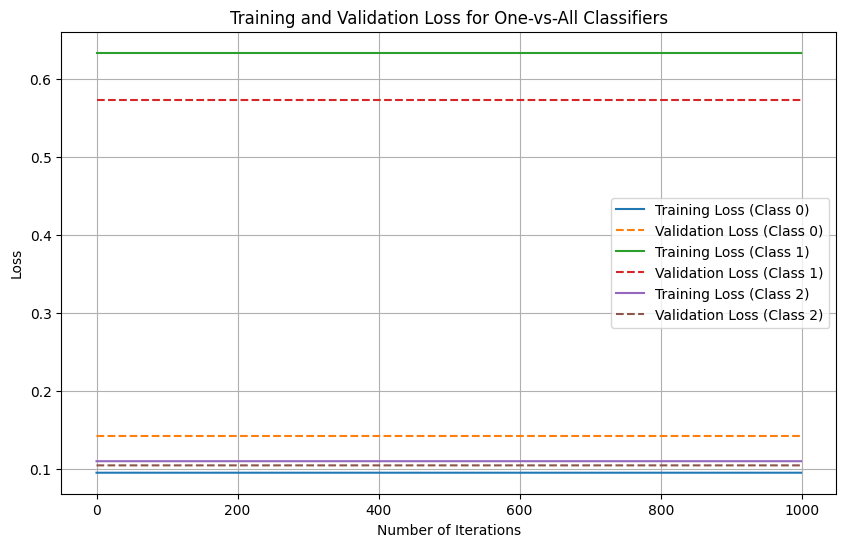

In [91]:
classifiers = {}
losses = {}
validation_losses = {}

for i in range(3):
    y_binary_train = (y_train == i).astype(int)
    y_binary_val = (y_val == i).astype(int)
    
    model = RegularizedLogisticRegression(learning_rate=0.5, n_iterations=1000, lambda_reg=0.1)
    
    training_losses = []
    validation_losses_i = []
    
    for epoch in range(model.n_iterations):
        model.fit(X_train_normalized, y_binary_train)
        y_train_pred_prob, _ = model.predict(X_train_normalized)
        train_loss = model.cross_entropy_loss(y_binary_train, y_train_pred_prob)
        
        y_val_pred_prob, _ = model.predict(X_val_normalized)
        val_loss = model.cross_entropy_loss(y_binary_val, y_val_pred_prob)
        
        training_losses.append(train_loss)
        validation_losses_i.append(val_loss)
    
    classifiers[i] = model
    losses[i] = training_losses
    validation_losses[i] = validation_losses_i

plt.figure(figsize=(10, 6))

for i in range(3):
    plt.plot(range(model.n_iterations), losses[i], label=f'Training Loss (Class {i})')
    plt.plot(range(model.n_iterations), validation_losses[i], label=f'Validation Loss (Class {i})', linestyle='--')

plt.title('Training and Validation Loss for One-vs-All Classifiers')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Evaluate  [15 Marks]

It's time to run your logistic regression model on the test dataset!

- Report the accuracy, F1 score and confusion matrix for each binary classifier [10 Points]
- Perform multiclass evaluation and report macro F1, accuracy and confusion matrix [5 marks]


In [92]:
results = {
    'Class': [],
    'Probs': [],
    'Accuracy': [],
    'F1 Score': [],
    'Confusion Matrix': []
}

for i in range(3):
    y_binary_train = (y_train == i).astype(int)
    y_binary_test = (y_test == i).astype(int)
    
    classifier = RegularizedLogisticRegression(learning_rate=0.01, n_iterations=1000, lambda_reg=0.1)
    classifier.fit(X_train_normalized, y_binary_train)
    predicted_prob, predicted_class = classifiers[i].predict(X_test_normalized)
    accuracy, f1_score, confusion_matrix = classifier.evaluate(y_binary_test, predicted_class)
    
    results['Class'].append(i)
    results['Probs'].append(predicted_prob)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1_score)
    results['Confusion Matrix'].append(confusion_matrix)

results_df = pd.DataFrame(results)

Confusion Matrix: 
TP: 59, TN: 133, FP: 6, FN: 2
Accuracy: 0.96
Precision: 0.9076923076923077
Recall: 0.9672131147540983
F1 Score: 0.9365079365079365
Confusion Matrix: 
TP: 1, TN: 123, FP: 1, FN: 75
Accuracy: 0.62
Precision: 0.5
Recall: 0.013157894736842105
F1 Score: 0.025641025641025637
Confusion Matrix: 
TP: 59, TN: 131, FP: 6, FN: 4
Accuracy: 0.95
Precision: 0.9076923076923077
Recall: 0.9365079365079365
F1 Score: 0.9218749999999999


In [94]:
results_df.drop('Probs',axis=1)

,Class,Accuracy,F1 Score,Confusion Matrix
0,0,0.96,0.936508,"[[133, 6], [2, 59]]"
1,1,0.62,0.025641,"[[123, 1], [75, 1]]"
2,2,0.95,0.921875,"[[131, 6], [4, 59]]"


In [95]:
class_labels = ['Class 0: Most Likely Human', 
                'Class 1: Further Testing', 
                'Class 2: Most Likely Zombie']

In [96]:
combined_probs = np.column_stack(results['Probs'])
multiclass_predictions = np.argmax(combined_probs, axis=1)
y_true = y_test

accuracy_multiclass = np.mean(multiclass_predictions == y_true)

n_classes = len(class_labels)
confusion_matrix_multiclass = np.zeros((n_classes, n_classes), dtype=int)
for true_label, pred_label in zip(y_true, multiclass_predictions):
    confusion_matrix_multiclass[true_label, pred_label] += 1

f1_scores = []
for i in range(n_classes):
    tp = confusion_matrix_multiclass[i, i]
    fp = confusion_matrix_multiclass[:, i].sum() - tp
    fn = confusion_matrix_multiclass[i, :].sum() - tp
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    f1_scores.append(f1_score)

macro_f1 = np.mean(f1_scores)

print("Multiclass Evaluation Results:")
print(f"Multiclass Accuracy: {accuracy_multiclass}")
print(f"Macro F1 Score: {macro_f1}")
print("Confusion Matrix:")
print(confusion_matrix_multiclass)


Multiclass Evaluation Results:
Multiclass Accuracy: 0.905
Macro F1 Score: 0.9065571126639829
Confusion Matrix:
[[59  2  0]
 [ 6 62  8]
 [ 0  3 60]]


# Part B: Use Scikit-learn  [10 Marks]

In this part, use scikit-learn’s [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation to train and test the logistic regression on the provided dataset.

Use scikit-learn’s `accuracy_score` function to calculate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), F1 score and [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to calculate confusion matrix on test set.

Finally, plot the confusion matrix

Accuracy: 0.9050
F1 Score: 0.9037
Confusion Matrix:
[[59  2  0]
 [ 6 62  8]
 [ 0  3 60]]


C:\Users\razah\AppData\Local\Temp\ipykernel_30588\78901945.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + class_labels)
C:\Users\razah\AppData\Local\Temp\ipykernel_30588\78901945.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + class_labels)


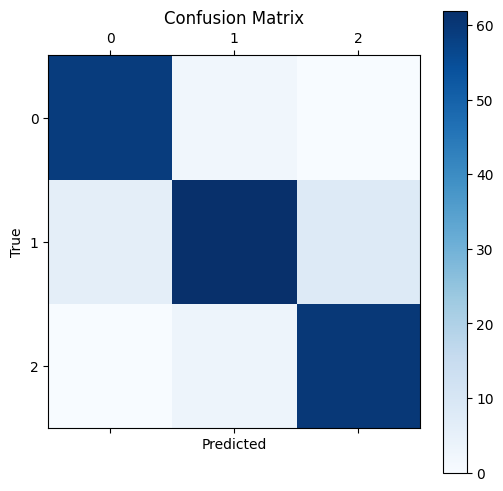

In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs')
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
accuracy = accuracy_score(y_test, y_pred)
f1_score_value = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score_value:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(conf_matrix, cmap='Blues')
fig.colorbar(cax)
class_labels = results['Class']
ax.set_xticklabels([''] + class_labels)
ax.set_yticklabels([''] + class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Part C: Are You a Zombie?  [5 marks]
Use your multiclass classifier to predict whether you are a zombie.

In [87]:
height = 180               # Height in cm
weight = 70               # Weight in kg
screen_time = 8          # Screen time in hours per day
junk_food_days = 5       # Junk food consumption in days per week
physical_activity = 10    # Physical activity in hours per week
task_completion = 10      # Task completion on a scale (example range: 1-10)

In [ ]:
test_point = np.array([height, weight, screen_time, junk_food_days, physical_activity, task_completion])
test_point = scaler.transform(test_point)

In [89]:

labels = {0: "Human", 1: "Needs Further Testing", 2: "Zombie"}
probs=[]
for i in range(3):  
    y_pred_class, prob = classifiers[i].predict(test_point.reshape(1,-1))    
    probs.append(prob)
combined_probs = np.column_stack([p for p in probs])
multi_class_pred = np.argmax(combined_probs, axis=1)
print("Prediction:", labels[multi_class_pred[0]])

Prediction: Human
